**SID: 3040752562**

### Import modules and create essential functions

In [1]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, SelectionSlider
import ipywidgets as widgets

In [2]:
def simulate(d_GNa, d_GK, d_GCl):
  '''
  Run the simulation and calculate equ membrane voltage
  '''

  # Fixed parameters
  G_leak = 5e-9
  V_r = -70e-3
  V_Na = 55e-3
  V_K = -92e-3
  V_Cl = -70e-3
  G_tot = G_leak + d_GNa + d_GK + d_GCl
  V = (V_r * G_leak + V_Na * d_GNa + V_K * d_GK + V_Cl * d_GCl)/G_tot
  return V

def plot(V, dG):
  '''
  Plot the equ membrane voltage against the delta in conductance
  '''
  plt.plot(dG,V*1e3)
  plt.show()

def plot_contour(dGNa_vals, dGK_vals, V_matrix):
  '''
  Create the contour plot for when both channels open
  '''
  contour = plt.contourf(dGNa_vals, dGK_vals, V_matrix, levels=25, cmap='viridis')
  plt.colorbar(contour)
  plt.grid(False)
  plt.show()

def plot_all(dGNa, V_no_inhibition, V_inhibition, V_superposition):
  '''
  Plot the three conditions together
  '''
  plt.plot(dGNa, V_no_inhibition, label='No Inhibition', linestyle='-.', color='blue', alpha=0.7)
  plt.plot(dGNa, V_inhibition, label='With Chloride Inhibition', linestyle='-', color='green')
  plt.plot(dGNa, V_superposition, label='Expected by Linear Superposition', linestyle='dashed', color='red', alpha=0.5)
  plt.title('Effect of ΔGNa on Membrane Potential with and without Shunting Inhibition')
  plt.xlabel('ΔGNa (nS)')
  plt.ylabel('Membrane Potential (mV)')
  plt.legend()
  plt.grid(True)
  plt.show()

# Part 1
### **i.**  (a)

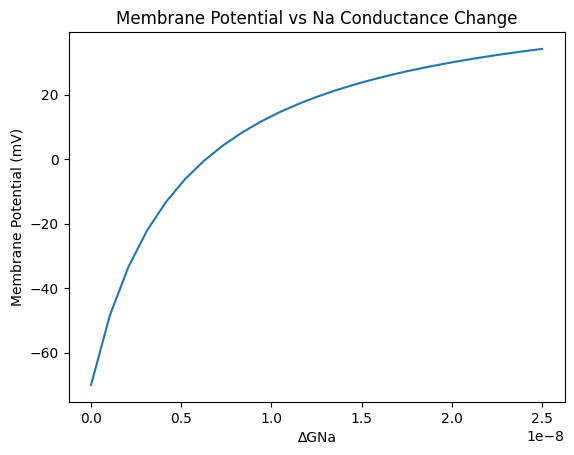

In [37]:
# Only sodium conductance changes
d_GNa = np.linspace(0, 25, 25)*1e-9
d_GK = 0
d_GCl = 0
V = simulate(d_GNa, d_GK, d_GCl)

plt.title('Membrane Potential vs Na Conductance Change')
plt.xlabel("∆GNa")
plt.ylabel("Membrane Potential (mV)")
plot(V, d_GNa)

As more sodium is allowed into a neuron, the membrane potential becomes more positively charged. For small changes in sodium conductance (less than 0.5 nS) the relationship between $\Delta Na$ and membrance potential appears approximately linear, but non-linearity arises the larger sodium conductance changes (0.5 and up).

### **i.**  (b)

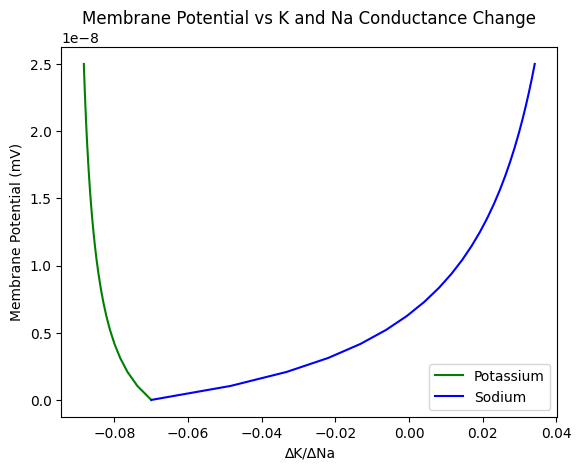

In [38]:
# Only Potassiumm conductance changes

d_GNa_ = 0
d_GK = np.linspace(0, 25, 25)*1e-9
d_GCl = 0
V_ = simulate(d_GNa_, d_GK, d_GCl)

plt.plot(V_, d_GK, label='Potassium', linestyle='-', color='green', alpha=1)
plt.plot(V, d_GNa, label='Sodium', linestyle='-', color='blue', alpha = 1)
plt.title('Membrane Potential vs K and Na Conductance Change')
plt.xlabel("∆K/∆Na")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.show()

As more potassium is allowed off a neuron, the membrane potential becomes more negatively charged, where non-linearity is more pronounced with higher conductance changes.

### **i.**  (c)

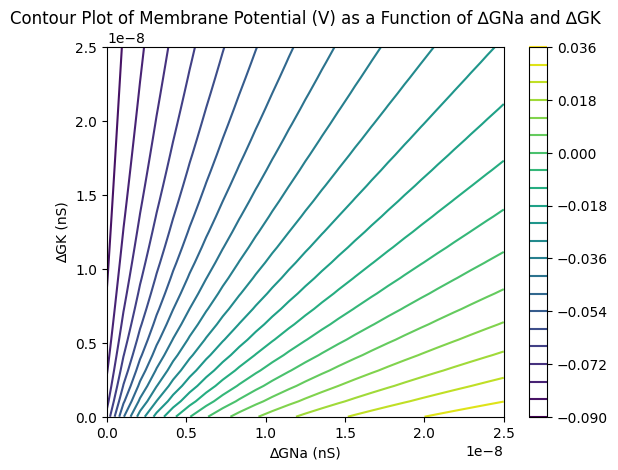

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for ΔGNa and ΔGK
X, Y = np.meshgrid(np.linspace(0, 25, 25)*1e-9, np.linspace(0, 25, 25)*1e-9)  # Grid for ΔGNa and ΔGK
d_GCl = 0  # Keeping chloride conductance constant

# Create the Z matrix (which stores the membrane potentials)
Z = np.zeros_like(X)

# Fill the Z matrix by simulating over a range of ΔGNa and ΔGK
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = simulate(X[i, j], Y[i, j], d_GCl)

# Plotting the contour plot
plt.contour(X, Y, Z, 20)  # Adjust the number of contour levels
plt.colorbar()
plt.xlabel("∆GNa (nS)")
plt.ylabel("∆GK (nS)")
plt.title("Contour Plot of Membrane Potential (V) as a Function of ∆GNa and ∆GK")
plt.show()


The bottom left part of the plot with low conductance changes appears more linear where lines are evenly spaced and approximately parallel, while the top right side with higher conductance changes show some non-linear effects where lines deviate from parallelism.

### **i.**  (d)

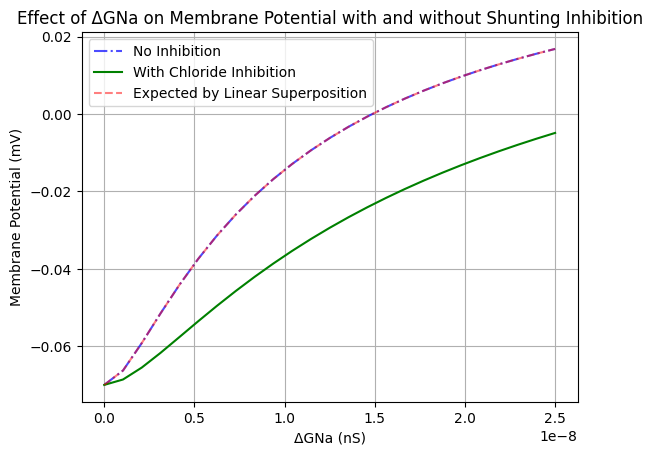

In [115]:
d_GNa =  np.linspace(0, 25, 25)*1e-9
d_GK = 0
d_GCl = 10*1e-9
V_both = simulate(d_GNa, d_GK, d_GCl)

d_GNa =  0
d_GK = 0
d_GCl = 10*1e-9
V_Cl = simulate(d_GNa, d_GK, d_GCl)

d_GNa = np.linspace(0, 25, 25)*1e-9
d_GK = 0
d_GCl = 0
V_Na = simulate(d_GNa, d_GK, d_GCl)


V_superposition = V_Na + V_Cl - V_r

plot_all(d_GNa, V_Na, V_both, V_superposition)


The plot shows that the membrane potential with chloride inhibition (green line) deviates significantly from the prediction by linear superposition (red dashed line). While the linear superposition assumes additive effects, the actual response is non-linear due to shunting inhibition. Chloride conductance reduces the membrane's responsiveness to increasing sodium conductance, leading to a more pronounced dampening effect that is not captured by simple linear addition. This demonstrates that inhibitory effects cannot be modeled by linear superposition alone. Because $V_{Cl}$ equals the resting potential, the linear superposition trend follows the membrane potential change in response to changing Na conductance only and the effect of Cl opening is cancelled.

### **ii.**

In [41]:
def simulate_membrane_dynamics(Cm, G_leak):

    # Constants
    V_rest = -70e-3  # -70 mV
    dt = 1e-3  # time step in seconds (1 ms)
    time = np.arange(0, 0.5, dt)  # 500 ms simulation
    tau = Cm / G_leak
    alpha = dt / tau

    # Input current
    I = np.zeros_like(time)
    I[time >= 0.1] = 100e-12  # 100 pA current injection only after 100 ms

    # Initialize membrane potential
    V = np.zeros_like(time)
    V[0] = V_rest

    # Simulation loop with the V update formula
    for n in range(len(time)-1):
        V[n+1] = alpha * (V_rest + I[n] / G_leak) + (1 - alpha) * V[n]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(time, V * 1e3)
    plt.title('Membrane Voltage Response over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane Voltage (mV)')
    plt.grid(True)
    plt.xlim(0, 0.5)
    plt.ylim(-80, 0)

    plt.show()
    plt.show()

# Slider for Cm
Cm_slider = SelectionSlider(
    options=[('50 pF', 50e-12), ('100 pF', 100e-12), ('150 pF', 150e-12), ('200 pF', 200e-12)],
    value=100e-12,
    description='Cm (F):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Slider for G_leak
G_leak_slider = SelectionSlider(
    options=[('1 nS', 1e-9), ('3 nS', 3e-9), ('5 nS', 5e-9), ('10 nS', 10e-9)],
    value=5e-9,
    description='G_leak (S):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

interact(simulate_membrane_dynamics, Cm=Cm_slider, G_leak=G_leak_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Cm (F):', index=1, options=(('50 p…

<function __main__.simulate_membrane_dynamics(Cm, G_leak)>

Increasing $C_m$ slows down the increase in membrane potential in response to input current. This is due to due to increased membrane time constant $\tau$ = $\frac{C_m}{G_{leak}}$. However, the steady-state membrane potential remains constant. On the other hand, increasing $G_{leak}$ decreases $\tau$ and thus the neuron reaches the steady state quicker, but the steady state membrane potential gets lower (less positive) due to more current leaking.


# Part 2

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def LIF_simulation(Cm=100e-12, G_leak=5e-9, V_thresh=-50e-3, t_ref=5e-3, I_input=100e-12):
    # Constants
    V_rest = -70e-3
    V_spike = 55e-3
    dt = 1e-3
    time = np.arange(0, 0.5, dt)
    tau = Cm / G_leak
    alpha = dt / tau

    # Input current
    I = np.zeros_like(time)
    I[time >= 0.1] = I_input

    # Membrane voltage initialization
    V = np.zeros_like(time)
    V[0] = V_rest
    refractory_counter = 0

    # Simulation loop
    for n in range(len(time)-1):
        if refractory_counter > 0:
            V[n+1] = V_rest
            refractory_counter -= 1
        else:
            V[n+1] = alpha * (V_rest + I[n] / G_leak) + (1 - alpha) * V[n]
            if V[n+1] >= V_thresh:
                V[n+1] = V_spike
                refractory_counter = int(t_ref / dt)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(time, V * 1e3, label='Membrane potential (mV)')
    plt.plot(time, I * 1e12, label='Input current (pA)', linestyle='--')
    plt.title('Leaky Integrate-and-Fire Model')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane Potential (mV) / Input Current (pA)')
    plt.legend()
    plt.grid(True)

    plt.show()



# Discrete slider for G_leak
G_leak_slider = SelectionSlider(
    options=[('1 nS', 1e-9), ('3 nS', 3e-9), ('5 nS', 5e-9), ('10 nS', 10e-9)],
    value=5e-9,
    description='G_leak (S):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)


t_ref_slider = SelectionSlider(
    options=[('1 ms', 1e-3), ('3 ms', 3e-3), ('5 ms', 5e-3), ('10 ms', 10e-3)],
    value=5e-3,
    description='t_ref (S):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

Cm_slider = SelectionSlider(
    options=[('50 pF', 50e-12), ('100 pF', 100e-12), ('150 pF', 150e-12), ('200 pF', 200e-12)],
    value=100e-12,
    description='Cm (F):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

I_input_slider = SelectionSlider(
    options=[('50 pA', 50e-12), ('75 pA', 75e-12), ('100 pA', 100e-12), ('101 pA', 101e-12), ('105 pA', 105e-12), ('125 pA', 125e-12), ('150 pA', 150e-12), ('200 pA', 200e-12), ('300 pA', 300e-12)],
    value=200e-12,
    description='I_input (S):',
    continuous_update=False,
    orientation='horizontal',
    readout=True
)


# Interactive widgets
interact(LIF_simulation,
         Cm = Cm_slider,
         G_leak=G_leak_slider,
         t_ref=t_ref_slider,
         I_input=I_input_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Cm (F):', index=1, options=(('50 p…

<function __main__.LIF_simulation(Cm=1e-10, G_leak=5e-09, V_thresh=-0.05, t_ref=0.005, I_input=1e-10)>

Setting $C_m$, $G_{leak}$, $V_{thresh}$, and $t_{ref}$ as given in the problem description, spikes only start to appear when input current exceeds 100 pA. Then, as input current increases, spike count gets higher because membrane potential gets pushed above the threshold more frequently. However, at very high input currents the spike count will reach a saturation regime as shown below.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, SelectionSlider

def simulate_firing_rate(Cm=100e-12, G_leak=5e-9, V_thresh=-50e-3, t_ref=5e-3):
    # Constants
    V_rest = -70e-3  # Resting membrane voltage
    V_spike = 55e-3  # Spike voltage
    dt = 1e-3  # Time step in seconds
    simulation_time = 0.5  # Total simulation time in seconds
    time = np.arange(0, simulation_time, dt)
    tau = Cm / G_leak
    alpha = dt / tau

    # Range of input currents in picoamperes
    input_currents = np.linspace(50e-12, 1000e-12, 20)  # From 50 pA to 300 pA
    firing_rates = []

    # Simulation for each input current
    for I_input in input_currents:
        I = np.zeros_like(time)
        I[time >= 0.1] = I_input  # Apply step input current after 100 ms

        # Membrane voltage initialization
        V = np.zeros_like(time)
        V[0] = V_rest
        refractory_counter = 0
        spike_count = 0

        # Simulation loop
        for n in range(len(time)-1):
            if refractory_counter > 0:
                V[n+1] = V_rest
                refractory_counter -= 1
            else:
                V[n+1] = alpha * (V_rest + I[n] / G_leak) + (1 - alpha) * V[n]
                if V[n+1] >= V_thresh:
                    V[n+1] = V_spike
                    spike_count += 1
                    refractory_counter = int(t_ref / dt)

        # Calculate firing rate (spikes per second)
        firing_rate = spike_count / simulation_time
        firing_rates.append(firing_rate)

    # Plotting the firing rate vs input current
    plt.figure(figsize=(10, 6))
    plt.plot(input_currents * 1e12, firing_rates, '-o')
    plt.title('Firing Rate as a Function of Input Current')
    plt.xlabel('Input Current (pA)')
    plt.ylabel('Firing Rate (spikes/s)')
    plt.grid(True)
    plt.show()

# Interactive widgets
interact(simulate_firing_rate,
         Cm=SelectionSlider(options=[('50 pF', 50e-12), ('100 pF', 100e-12),
                                      ('150 pF', 150e-12), ('200 pF', 200e-12)],
                             value=100e-12, description='Cm (F):', continuous_update=False),
         G_leak=SelectionSlider(options=[('1 nS', 1e-9), ('3 nS', 3e-9),
                                         ('5 nS', 5e-9), ('10 nS', 10e-9)],
                                value=5e-9, description='G_leak (S):', continuous_update=False),
         V_thresh=SelectionSlider(options=[('-60 mV', -60e-3), ('-55 mV', -55e-3),
                                           ('-50 mV', -50e-3), ('-45 mV', -45e-3)],
                                  value=-50e-3, description='V_thresh (mV):', continuous_update=False),
         t_ref=SelectionSlider(options=[('1 ms', 1e-3), ('3 ms', 3e-3),
                                        ('5 ms', 5e-3), ('10 ms', 10e-3)],
                               value=5e-3, description='t_ref (ms):', continuous_update=False))



interactive(children=(SelectionSlider(continuous_update=False, description='Cm (F):', index=1, options=(('50 p…

<function __main__.simulate_firing_rate(Cm=1e-10, G_leak=5e-09, V_thresh=-0.05, t_ref=0.005)>

The firing rate as a function of input current exhibits a threshold-like behavior followed by a near-linear increase. Initially, at low input currents, the neuron does not fire because the current is insufficient to bring the membrane potential to the threshold for spiking. Once the input current surpasses this threshold (around 100 pA in this case), the firing rate starts to increase. Beyond this threshold, the firing rate rises approximately linearly with increasing input current, reflecting the leaky-integrator dynamics: as the input current increases, the neuron accumulates charge more quickly and reaches the threshold for firing more often. At higher currents (around 500 pA), the relationship between input current and firing rate can start to deviate from linearity. This happens because factors like the refractory period start to limit how frequently the neuron can fire. As input currents become large, the firing rate may saturate, approaching a maximum rate determined by the refractory period and the time it takes for the neuron to reset after each spike.

In [15]:
# Load current and kernel files
current = np.load("/content/drive/My Drive/current.npy")
kernel = np.load("/content/drive/My Drive/kernel.npy")

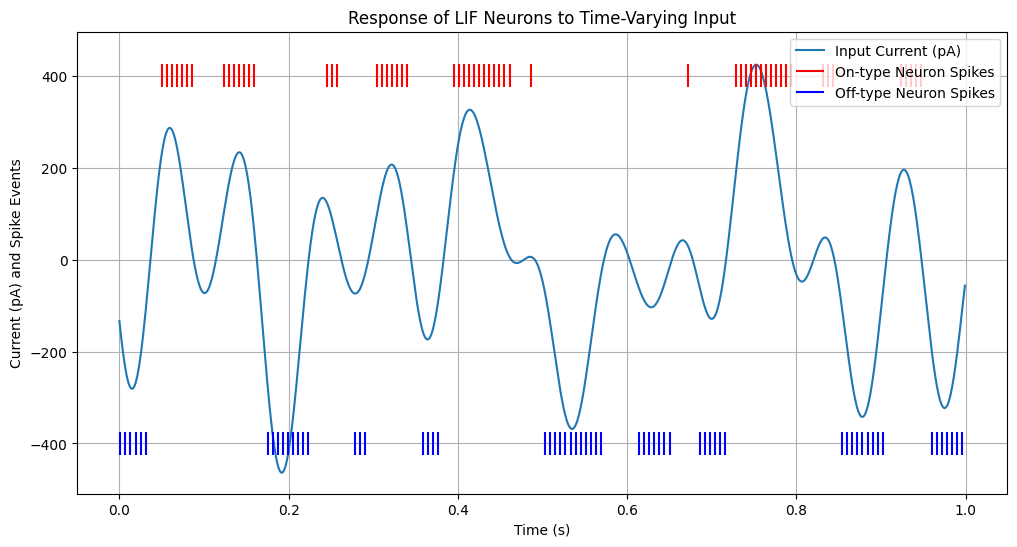

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def LIF_neuron(t, dt, I, Cm, G_leak, V_rest, V_thresh, t_ref):
    '''
    Simulate a single LIF neuron.
    '''
    tau = Cm / G_leak
    alpha = dt / tau
    V = np.zeros_like(t)
    V[0] = V_rest
    spikes = []
    refractory_counter = 0

    for i in range(1, len(t)):
        if refractory_counter > 0:
            refractory_counter -= 1
            V[i] = V_rest
        else:
            V[i] = V[i-1] + alpha * (V_rest - V[i-1] + I[i] / G_leak)
            if V[i] >= V_thresh:
                spikes.append(t[i])
                V[i] = V_rest
                refractory_counter = int(t_ref / dt)

    return spikes

# Simulation parameters
dt = 0.001  # Time step (1 ms)
t = np.arange(0, 1, dt)
I = current

# Parameters
Cm = 100e-12  # Membrane capacitance in farads
G_leak = 5e-9  # Leak conductance in siemens
V_rest = -70e-3  # Resting membrane potential in volts
V_thresh = -50e-3  # Spike threshold in volts
t_ref = 5e-3  # Refractory period in seconds

# Simulate neurons
spikes_on = LIF_neuron(t, dt, I, Cm, G_leak, V_rest, V_thresh, t_ref)
spikes_off = LIF_neuron(t, dt, -I, Cm, G_leak, V_rest, V_thresh, t_ref)  # Invert current for off-type

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, I, label='Input Current (pA)')
plt.eventplot(spikes_on, lineoffsets=400, linelengths=50, colors='r', label='On-type Neuron Spikes')
plt.eventplot(spikes_off, lineoffsets=-400, linelengths=50, colors='b', label='Off-type Neuron Spikes')
plt.title('Response of LIF Neurons to Time-Varying Input')
plt.xlabel('Time (s)')
plt.ylabel('Current (pA) and Spike Events')
plt.legend()
plt.grid(True)
plt.show()


The plot shows two Leaky Integrate-and-Fire (LIF) neurons responding to a time-varying input: one on-type neuron spikes in response to positive currents, and one off-type neuron spikes in response to negative currents. This illustrates nonlinear encoding, where each neuron encodes different portions of the signal—positive or negative—allowing for an efficient representation of the input's transitions and variations.

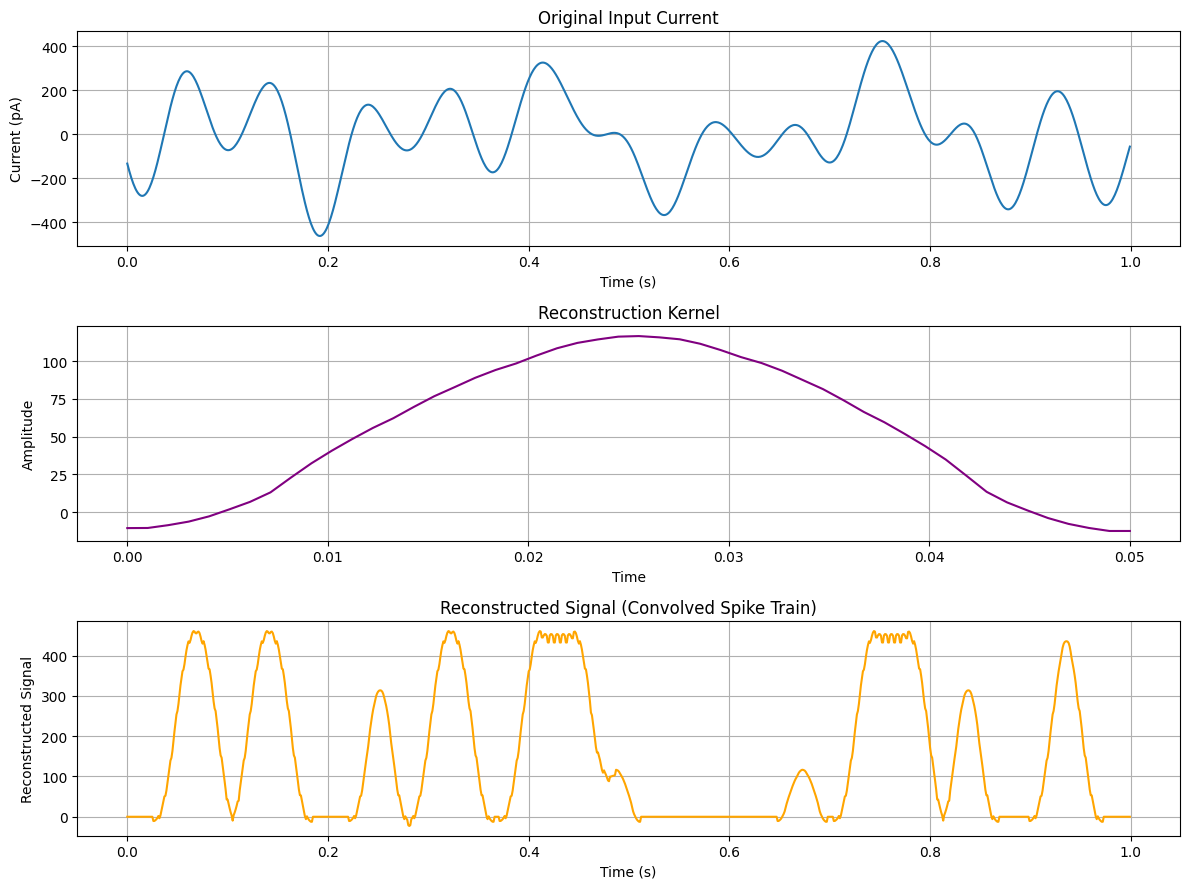

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def LIF_neuron(t, dt, I, Cm, G_leak, V_rest, V_thresh, t_ref):
    """
    Simulate LIF with a different spike array structure for smoother execution
    """
    tau = Cm / G_leak
    alpha = dt / tau
    V = np.zeros_like(t)
    V[0] = V_rest
    spikes = np.zeros_like(t)
    refractory_counter = 0

    for i in range(1, len(t)):
        if refractory_counter > 0:
            refractory_counter -= 1
            V[i] = V_rest
        else:
            V[i] = V[i-1] + alpha * (V_rest - V[i-1] + I[i] / G_leak)
            if V[i] >= V_thresh:
                spikes[i] = 1
                V[i] = V_rest
                refractory_counter = int(t_ref / dt)

    return spikes

# Simulation parameters
dt = 0.001  # Time step (1 ms)
t = np.arange(0, 1, dt)  # Simulation time from 0 to 1 second
I = current  # Generate input current

# LIF neuron parameters
Cm = 100e-12  # Membrane capacitance in farads
G_leak = 5e-9  # Leak conductance in siemens
V_rest = -70e-3  # Resting membrane potential in volts
V_thresh = -50e-3  # Spike threshold in volts
t_ref = 5e-3  # Refractory period in seconds

# Simulate the LIF neuron to get the spike train
spikes = LIF_neuron(t, dt, I, Cm, G_leak, V_rest, V_thresh, t_ref)

# Kernel for decoding the signal
kernel = kernel  # Placeholder kernel for now

# Perform convolution of spike train with the kernel to reconstruct the signal
reconstructed_signal = convolve(spikes, kernel, mode='same')

# Plotting
plt.figure(figsize=(12, 9))
# Plot the kernel
plt.subplot(3, 1, 2)
plt.plot(np.linspace(0,0.05,50), kernel, label='Reconstruction Kernel', color='purple')
plt.title('Reconstruction Kernel')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the original input current
plt.subplot(3, 1, 1)
plt.plot(t, I, label='Input Current (pA)')
plt.title('Original Input Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')
plt.grid(True)

# Plot the reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.title('Reconstructed Signal (Convolved Spike Train)')
plt.xlabel('Time (s)')
plt.ylabel('Reconstructed Signal')
plt.grid(True)

plt.tight_layout()
plt.show()


The reconstruction kernel approximates the effect of the LIF neuron's synaptic response, and when convolved with the spike train, it attempts to recreate the original input signal. The reconstructed signal in the bottom plot closely follows the shape of the original input current, but some discrepancies remain, especially in the amplitude and fine details. These differences arise because the reconstruction kernel is an approximation and might not perfectly match the encoding dynamics of the LIF neurons used in the simulation.

Below is also a reconstruction attempt but with MSE optimization

Initial Kernel MSE: 38998.216374
Optimized Kernel MSE: 20739.466644


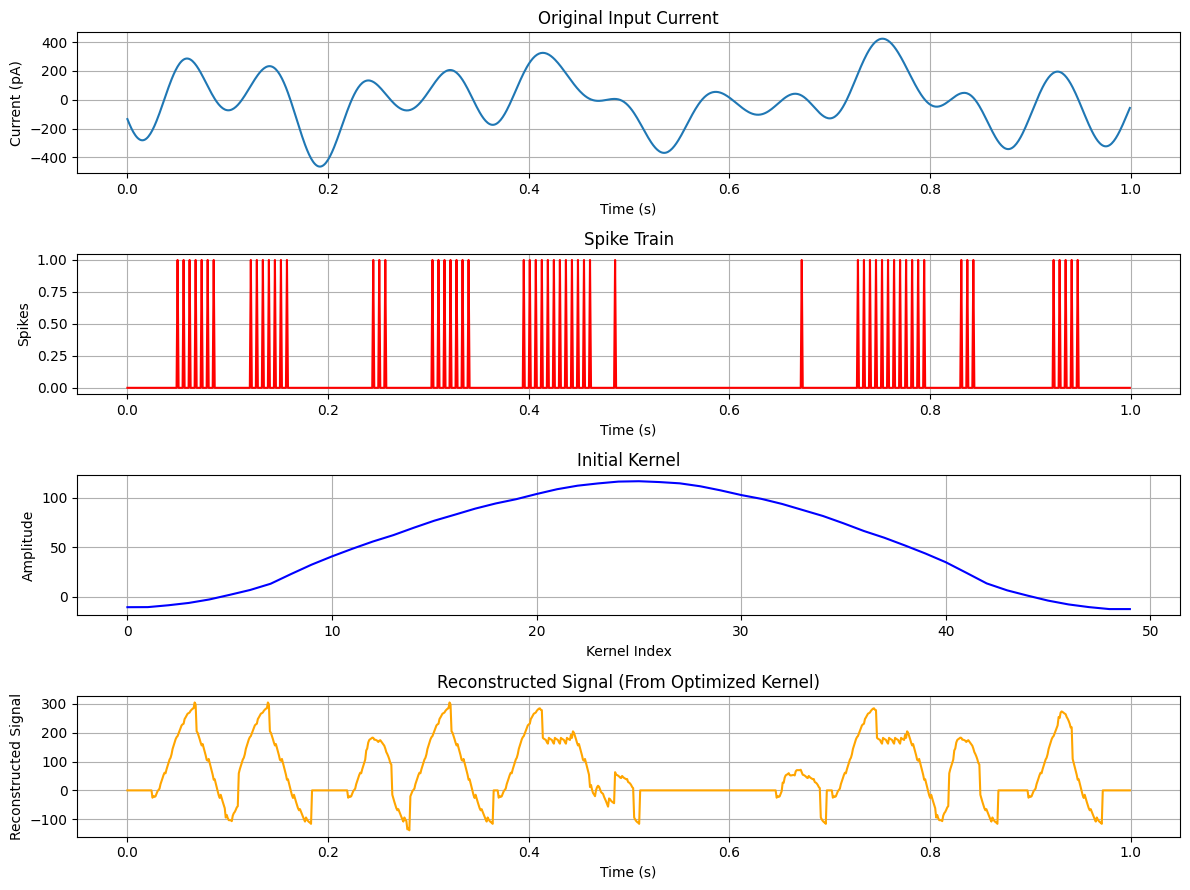

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



def reconstruct_signal(spikes, kernel, dt):
    '''
    Manually Reconstruct the signal from the spike train using convolution
    '''
    reconstructed_signal = np.zeros(len(spikes))

    # For each spike, convolve with the kernel and sum the contributions
    for i, spike in enumerate(spikes):
        if spike == 1:  # There was a spike at this time
            start = max(0, i - len(kernel) // 2)
            end = min(len(spikes), i + len(kernel) // 2)
            kernel_start = len(kernel) // 2 - (i - start)
            kernel_end = kernel_start + (end - start)
            reconstructed_signal[start:end] += kernel[kernel_start:kernel_end]

    return reconstructed_signal

def mse_error(kernel, spikes, input_signal, dt):
    """ Mean Squared Error between the original signal and the reconstructed signal. """
    reconstructed_signal = reconstruct_signal(spikes, kernel, dt)
    error = np.mean((input_signal - reconstructed_signal) ** 2)
    return error

# Simulation parameters
dt = 0.001  # Time step (1 ms)
t = np.arange(0, 1, dt)  # Simulation time from 0 to 1 second
I = current  # Generate input current

# LIF neuron parameters
Cm = 100e-12  # Membrane capacitance in farads
G_leak = 5e-9  # Leak conductance in siemens
V_rest = -70e-3  # Resting membrane potential in volts
V_thresh = -50e-3  # Spike threshold in volts
t_ref = 5e-3  # Refractory period in seconds

# Simulate the LIF neuron to get the spike train
spikes = LIF_neuron(t, dt, I, Cm, G_leak, V_rest, V_thresh, t_ref)

# Initialize a random kernel
kernel_initial = kernel
# Optimize the kernel using least squares error
result = minimize(mse_error, kernel_initial, args=(spikes, I, dt), method='BFGS')
initial_mse = mse_error(kernel_initial, spikes, I, dt)
print(f"Initial Kernel MSE: {initial_mse:.6f}")
# Get the optimized kernel
optimal_kernel = result.x
optimized_mse = mse_error(optimal_kernel, spikes, I, dt)
print(f"Optimized Kernel MSE: {optimized_mse:.6f}")
# Reconstruct the signal using the optimized kernel
reconstructed_signal = reconstruct_signal(spikes, optimal_kernel, dt)

# Plot the input current, spikes, and reconstructed signal
plt.figure(figsize=(12, 9))

# Plot the original input current
plt.subplot(4, 1, 1)
plt.plot(t, I, label='Input Current (pA)')
plt.title('Original Input Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')
plt.grid(True)

# Plot the spike train
plt.subplot(4, 1, 2)
plt.plot(t, spikes, label='Spike Train', color='red')
plt.title('Spike Train')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.grid(True)

# Plot the initial random kernel
plt.subplot(4, 1, 3)
plt.plot(kernel_initial, label='Initial Kernel', color='blue')
plt.title('Initial Kernel')
plt.xlabel('Kernel Index')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the reconstructed signal using the optimized kernel
plt.subplot(4, 1, 4)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal (Optimized Kernel)', color='orange')
plt.title('Reconstructed Signal (From Optimized Kernel)')
plt.xlabel('Time (s)')
plt.ylabel('Reconstructed Signal')
plt.grid(True)

plt.tight_layout()
plt.show()


After modifying the kernel using MSE optimization, the reconstructed signal is less different from the true input current, as shown by the mean squared error values.